# Ensemble Learning with Boosting and Random Forest on Wine Dataset

In this notebook, we will use **Boosting** and **Ensemble** methods to classify different types of wine from the **Wine dataset**.

We will apply the **Gradient Boosting Classifier** (a boosting algorithm) and the **Random Forest Classifier** (an ensemble method) to classify the wine classes. We will evaluate both models using **accuracy** and visualize the **confusion matrix** to understand how well the models perform.


### Step 1: Import Necessary Libraries

We start by importing the necessary libraries for data handling, model training, and evaluation.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


### Step 2: Load the Wine Dataset
We will load the Wine dataset from the **wine.csv** file located in the **Datasets** folder. This dataset contains information about wine samples and their classes.

In [2]:
# Load the Wine dataset 
wine_data = pd.read_csv('Datasets/wineData.csv')

# drop the id
wine_data = wine_data.drop('Id', axis=1)
wine_data.head()  # Display the first 5 rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Step 3: Split the Dataset into Features and Target
We will separate the dataset into the feature variables (X) and the target variable (y), which indicates the wine class.

In [3]:
# Split the dataset into features (X) and target variable (y)
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target variable (wine class)

### Step 4: Split the Data into Training and Test Sets
We will split the dataset into training and test sets (80% for training and 20% for testing). This helps us evaluate the models on unseen data.

In [4]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 5: Train the Models
Now, we will train two models: a **Gradient Boosting Classifier** and a **Random Forest Classifier**. Both are ensemble methods that are well-suited for classification tasks like this one.

In [5]:
# Train the Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Step 6: Evaluate the Models
We will now evaluate both models by calculating their **accuracy** on the test set. Accuracy is a measure of how many predictions were correct out of the total predictions.

In [6]:
# Evaluate the models' accuracy
y_pred_gb = gb.predict(X_test)
y_pred_rf = rf.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Gradient Boosting Classifier: {accuracy_gb:.2f}')
print(f'Accuracy of Random Forest Classifier: {accuracy_rf:.2f}')


Accuracy of Gradient Boosting Classifier: 0.69
Accuracy of Random Forest Classifier: 0.70


### Step 7: Visualize the Confusion Matrix
We will now visualize the confusion matrix for both models. 

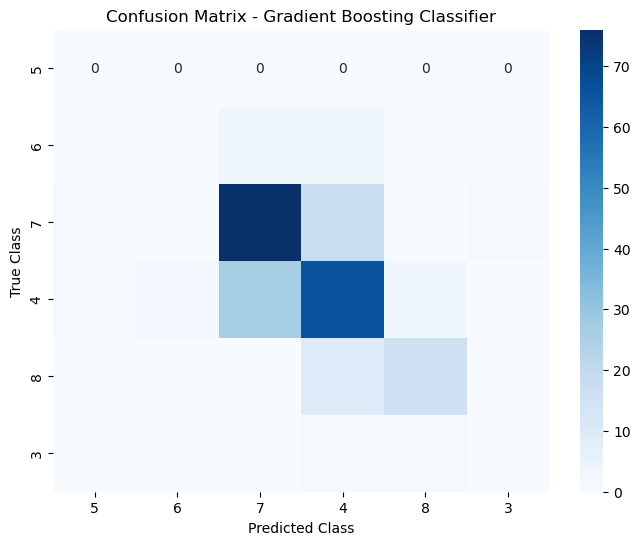

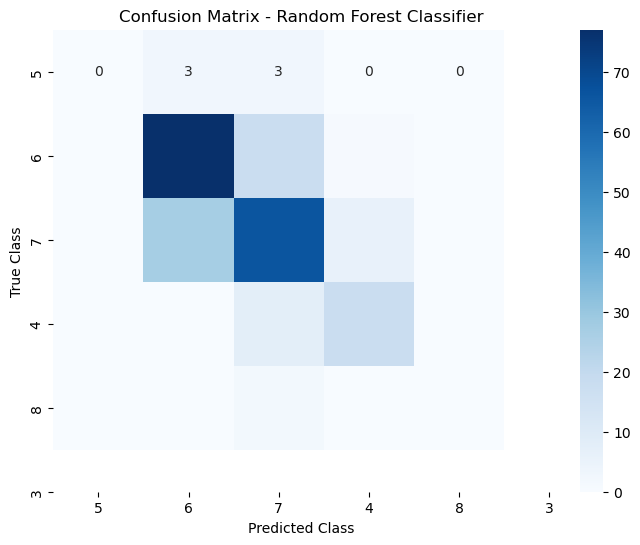

In [7]:
# Confusion Matrix Visualization for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Confusion Matrix Visualization for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()
